# EDA Kickstarter

#### BOCQUILLON Pierre - Hetic MD4 P2020 - le 06/12/2018

In [1]:
#importer les modules necessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wng

#afficher des graph avec matplotlib
%matplotlib inline

#masquer les warning
wng.filterwarnings('ignore')

In [2]:
#charger le dataset au format csv en indiquant la collone d'index
df = pd.read_csv('dataset.csv', index_col=0)

## 1/ Prise de connaissance du dataset 

In [3]:
#affichage des 3 premier element pour avoir une idee de la forme du dataset
df.head(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


In [4]:
#connaitre le nombre exacte de lignes et colonnes du dataset
df.shape

(378661, 14)

In [5]:
#connaitre le type de toute les donnes
df.dtypes

name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [6]:
#recuperer quelques information sur les differentes colonnes numeriques
df.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


## 2/ Gestion des valeurs manquantes et dupliquée  

In [7]:
#detecter les colonnes ou il y a des valeurs manquantes
df.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

- avec seulement 4 données manquantes sur 378661 ,la colonnes 'name' pouras etre exploiter pour cela nous allons remplacer les données manquante par 'no_name'.
- la colonne 'usd pleged quant a elle en a 3797 sur 378661 soit environ 1% pouras etre exploiter pour cela nous allons remplacer les données manquante par 'no_pleged_info'.


In [8]:
#remplacement des name null en 'no_name'
df.name[df.name.isna()] = 'no_name'
df['usd pledged'][df['usd pledged'].isna()] = 'no_pledged_info'

In [9]:
#detecter les valeurs dupliquées
df.duplicated().value_counts()

False    378661
dtype: int64

aucune données n'est dupliquer nous n'avons donc pas a supprimer de données

## 3/ analyse de la correlation des variables numeriques  

Text(0.5, 1.0, 'heatmap des correlations du dataset')

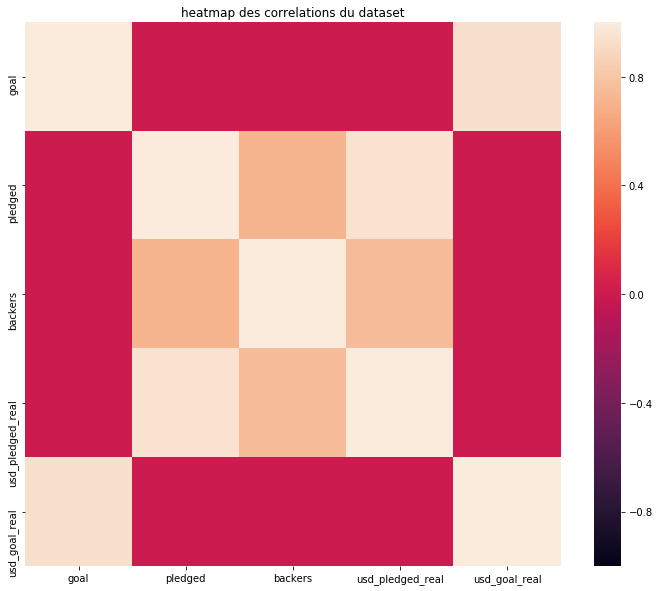

In [10]:
#afficher une heatmap de la correlation des colonnes a valeur numerique
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1)
plt.title('heatmap des correlations du dataset')

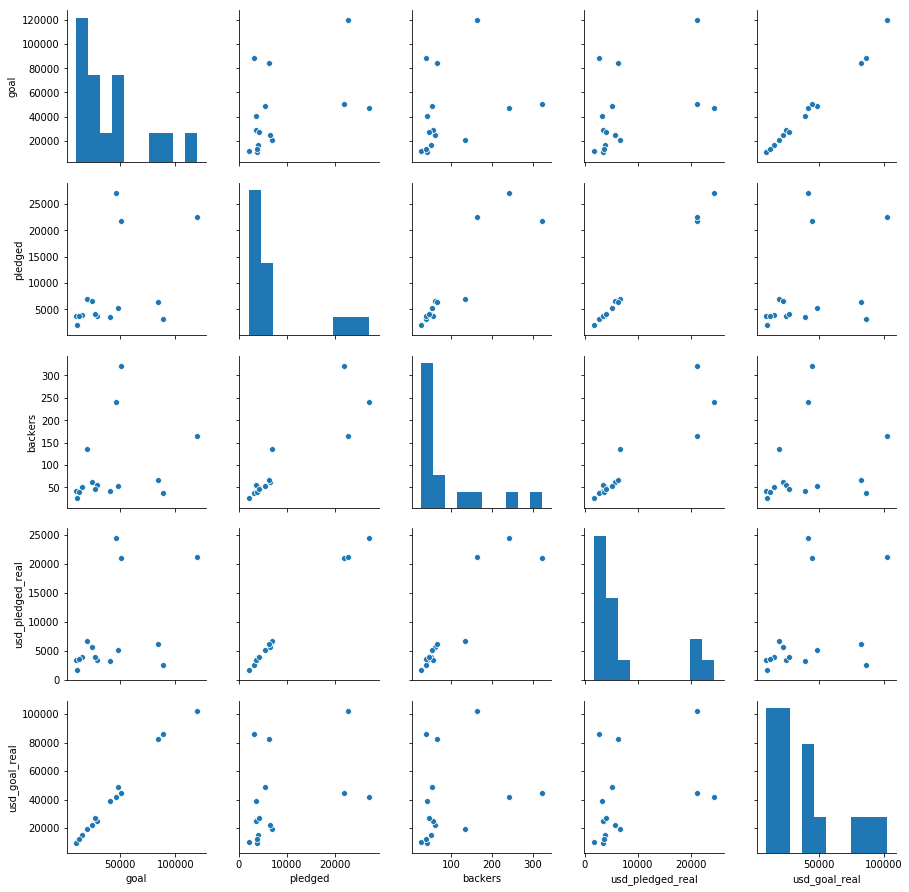

In [11]:
df4 = df.groupby(['main_category']).mean()
sns.pairplot(df4)

on peut voire ici que goal et usd_goal_real sont fortement correllés tout comme pledged,backers,usd pledged et usd_pledged_real

## 4/ Gestion du succés  

Text(0.5, 1.0, "frequence de chaqu'un des status")

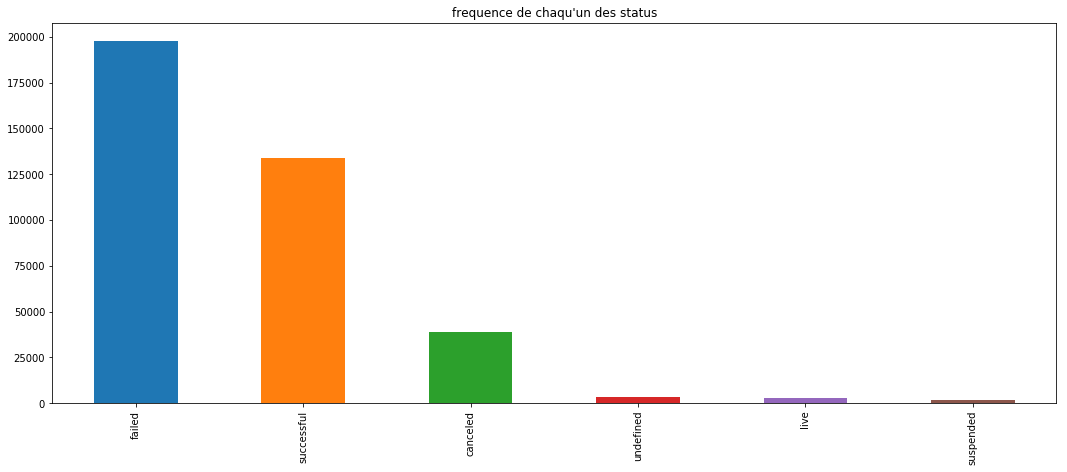

In [12]:
plt.subplots(figsize=(18,7))
df.state.value_counts().plot.bar()
plt.title('frequence de chaqu\'un des status')

on remarque que les projet avec un status undefined, live ou suspendes son tres peu nombreux en comparaisons avec les autres.   
seul le succes nous interresse nous allons donc creer une nouvelle colonne qui ne designeras que le succes d'un projet

In [13]:
#ajout d'une colonnes 'success' qui pend en valeur 1 si le projet est un succé et 0 sinon
df.insert(column = 'success',value = 0,loc = 14)
df.success[df.state == 'successful'] = 1

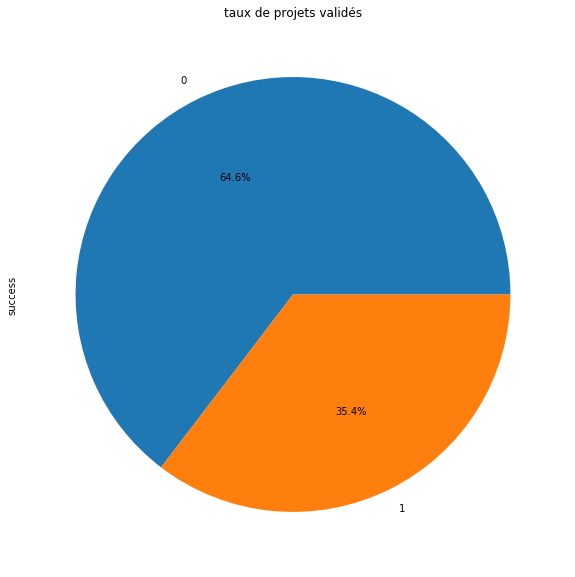

In [14]:
plt.subplots(figsize=(18,10))
df.success.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('taux de projets validés')
plt.show()

## 5/ les "main_category"  

Text(0.5, 1.0, "frequence de chaqu'une des main_category")

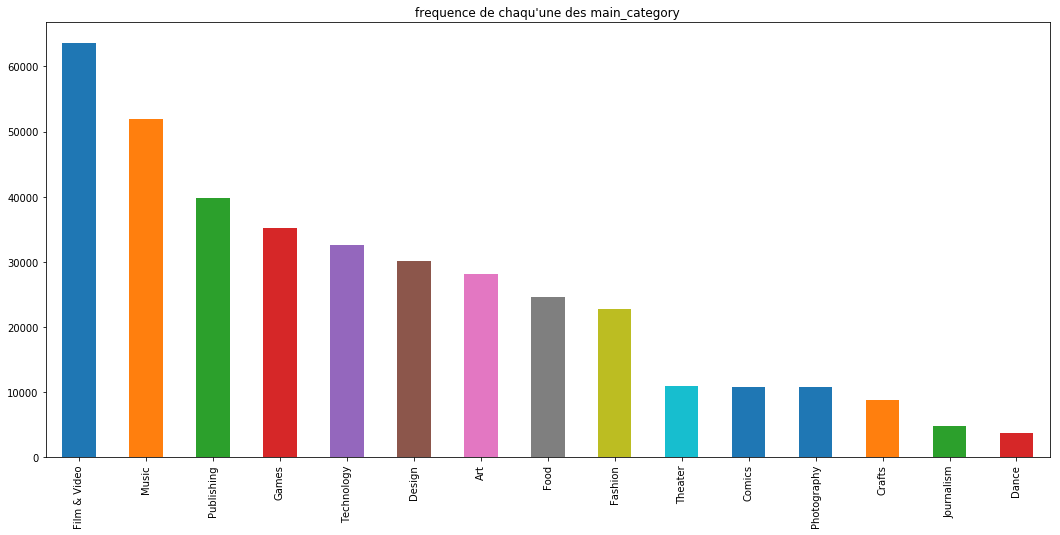

In [15]:
#analyse univarié de main-category
plt.subplots(figsize=(18,8))
df.main_category.value_counts().plot.bar()
plt.title('frequence de chaqu\'une des main_category')

Text(0.5, 1.0, "frequence de chaqu'une des main_category en fonction du succes ou non du projet")

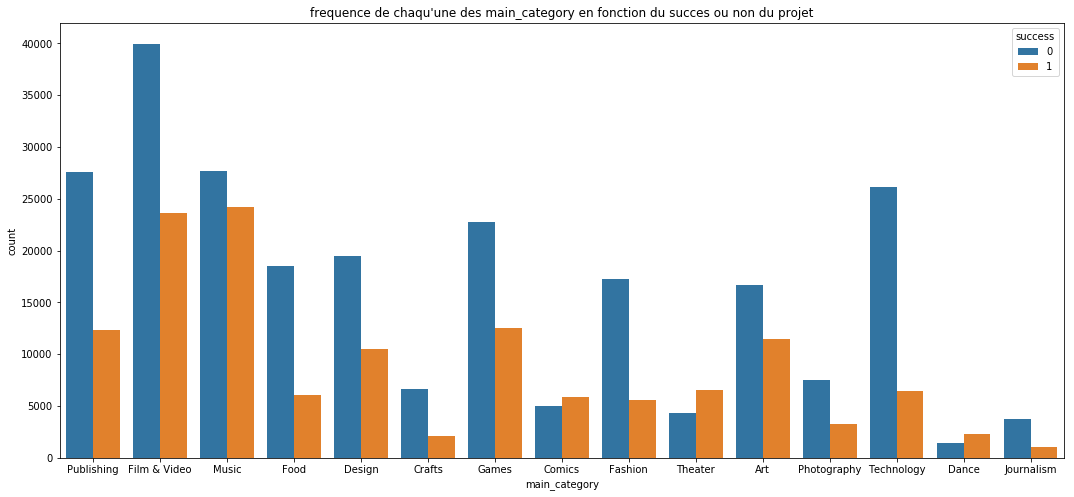

In [16]:
#analyse univarié de main-category er success
plt.subplots(figsize=(18,8))
sns.countplot(x="main_category", hue="success", data=df)
plt.title('frequence de chaqu\'une des main_category en fonction du succes ou non du projet')

Text(0.5, 1.0, 'taux de succes par raport a la main_category')

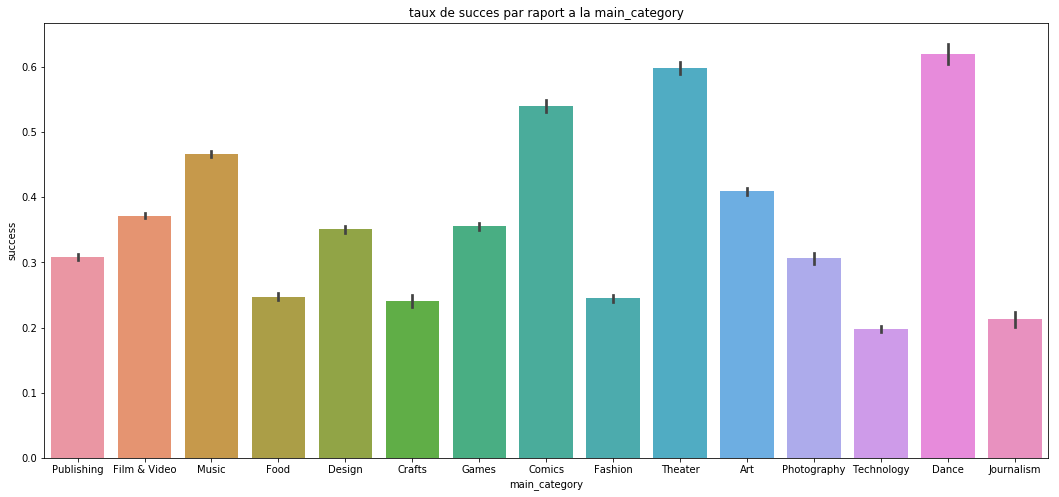

In [17]:
#meme chose que recedement mais avec un taux en pourcentage
plt.subplots(figsize=(18,8))
sns.barplot(x = df.main_category, y = df.success,data=df)
plt.title('taux de succes par raport a la main_category')

on en conclue donc que pour avoir plus de chance de succés un projet doit figurer dans la main_category Dance ,Theatre ou encore comics car elle ont un taux de succes superieur a 50%

## 6/ les "category"

nous allons analyser ici uniquement les category des element avec une main category ayant une chance de succes superieur a 50%

Text(0.5, 1.0, 'taux de succes par raport a la category dans Dance')

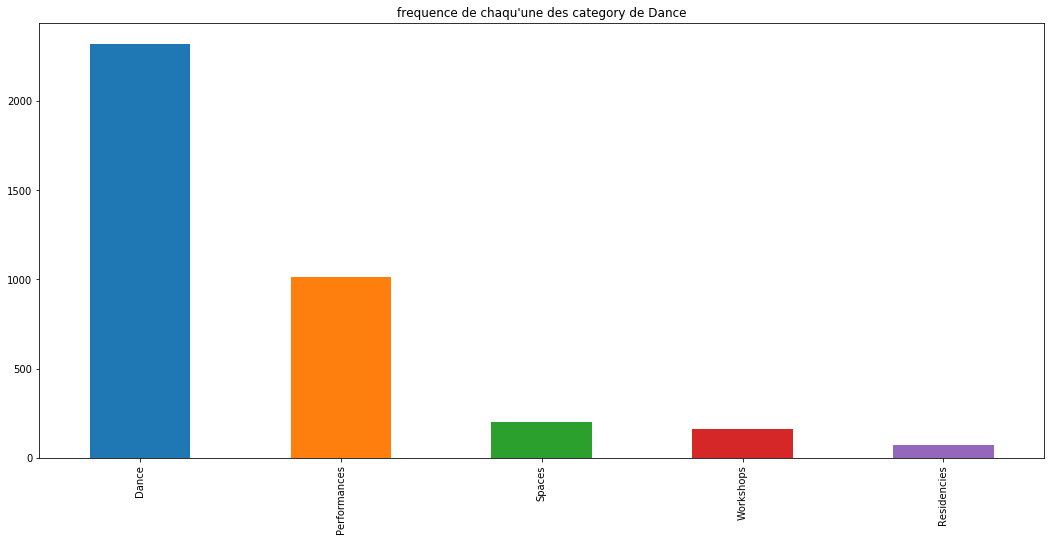

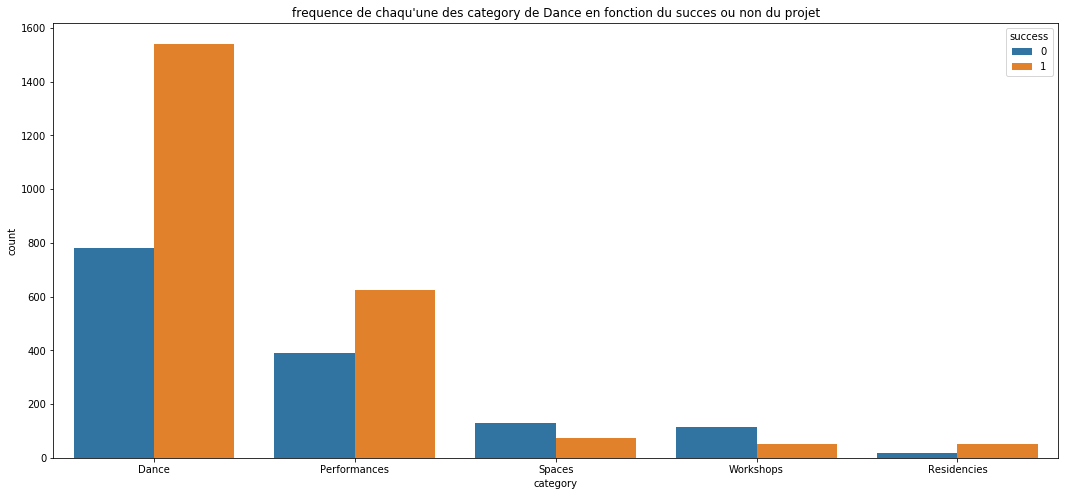

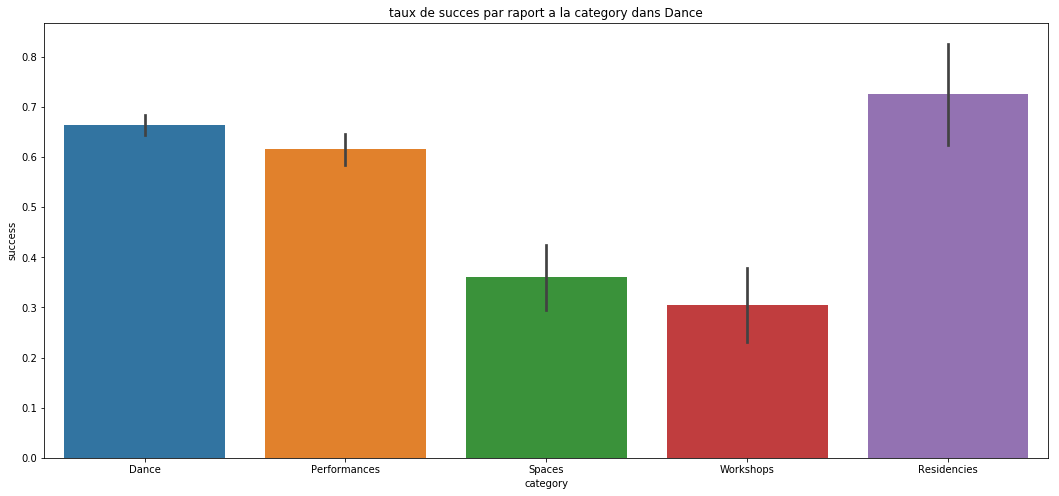

In [18]:
plt.subplots(figsize=(18,8))
df.category[df.main_category == 'Dance'].value_counts().plot.bar()
plt.title('frequence de chaqu\'une des category de Dance')
plt.subplots(figsize=(18,8))
sns.countplot(x="category", hue="success", data=df[df.main_category == 'Dance'])
plt.title('frequence de chaqu\'une des category de Dance en fonction du succes ou non du projet')
plt.subplots(figsize=(18,8))
sns.barplot(x = df.category[df.main_category == 'Dance'], y = df.success[df.main_category == 'Dance'],data=df)
plt.title('taux de succes par raport a la category dans Dance')

on en conclue donc que pour avoir plus de chance de succés un projet doit figurer dans la category Dance ,Performances ou encore Residencies car elle ont un taux de succes superieur a 50%

Text(0.5, 1.0, 'taux de succes par raport a la category dans Comics')

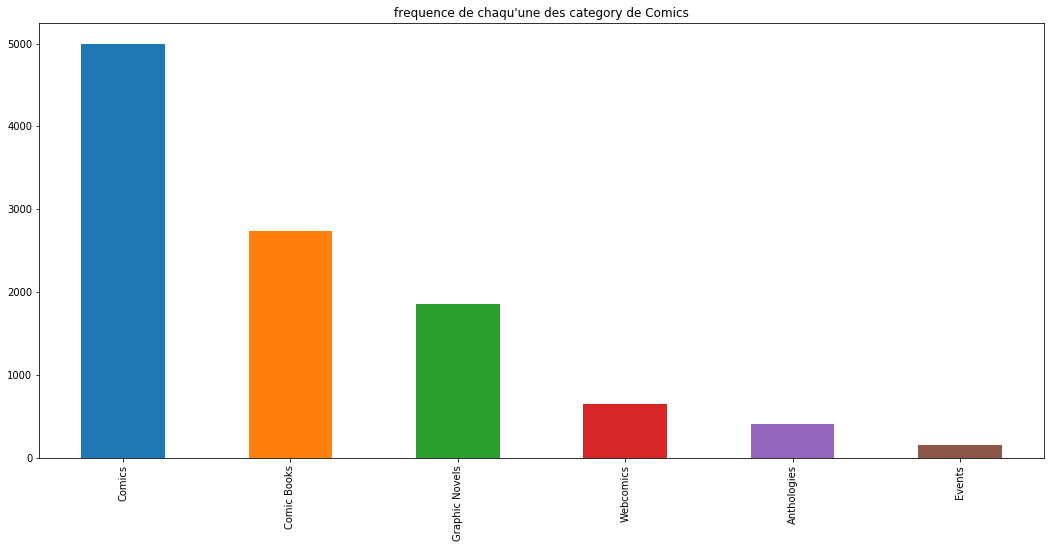

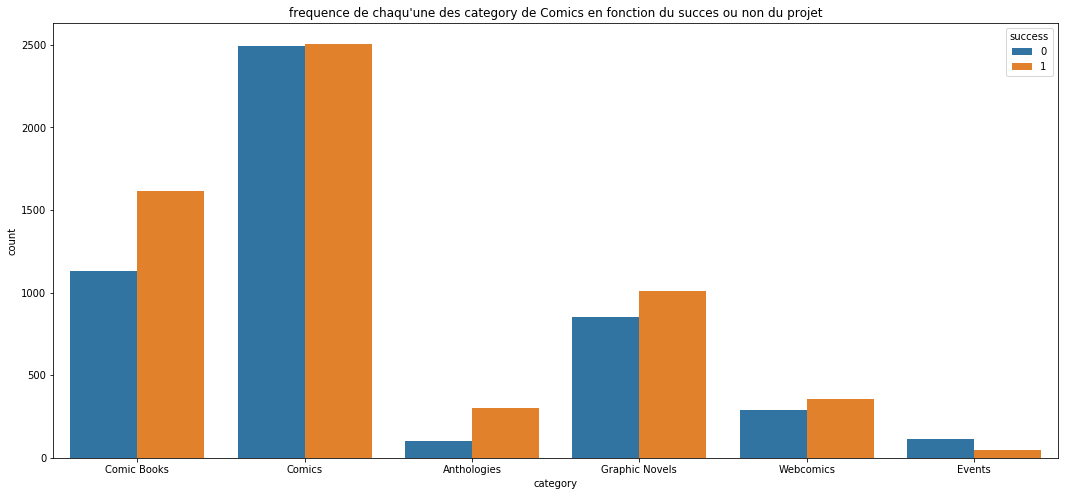

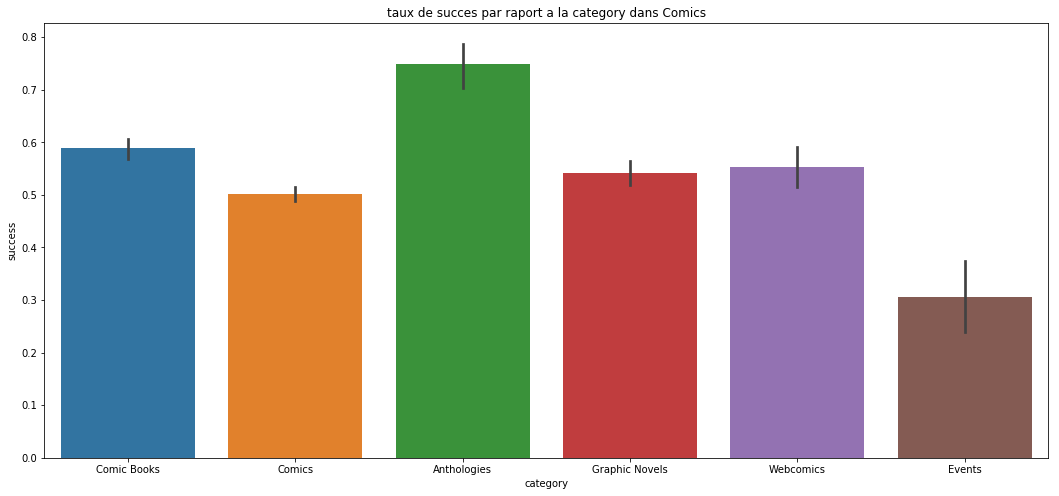

In [19]:
plt.subplots(figsize=(18,8))
df.category[df.main_category == 'Comics'].value_counts().plot.bar()
plt.title('frequence de chaqu\'une des category de Comics')
plt.subplots(figsize=(18,8))
sns.countplot(x="category", hue="success", data=df[df.main_category == 'Comics'])
plt.title('frequence de chaqu\'une des category de Comics en fonction du succes ou non du projet')
plt.subplots(figsize=(18,8))
sns.barplot(x = df.category[df.main_category == 'Comics'], y = df.success[df.main_category == 'Comics'],data=df)
plt.title('taux de succes par raport a la category dans Comics')

on en conclue donc que pour avoir plus de chance de succés un projet doit figurer dans la main_category Anthologies car elle a un taux de succes superieur a 70%

Text(0.5, 1.0, 'taux de succes par raport a la category dans Theater')

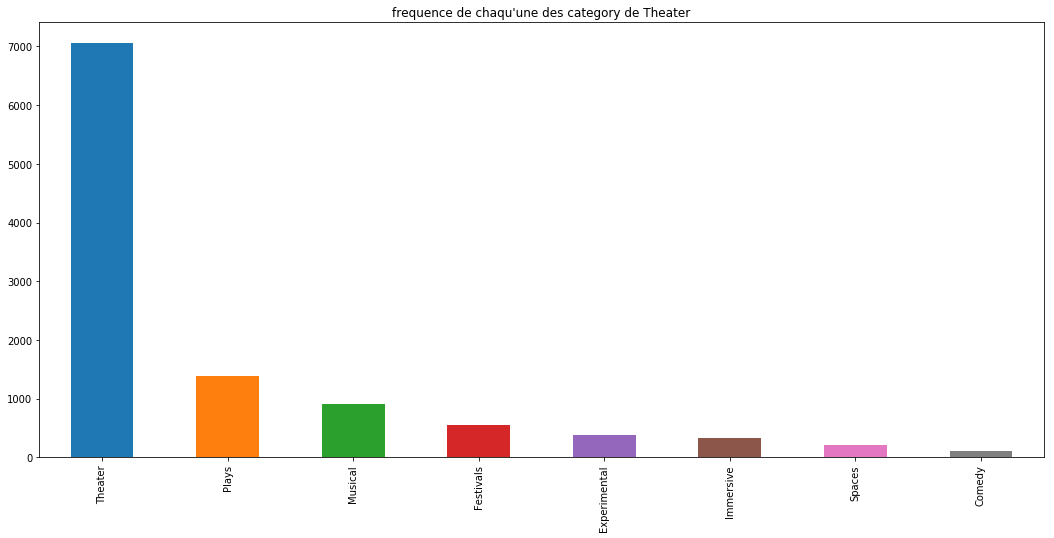

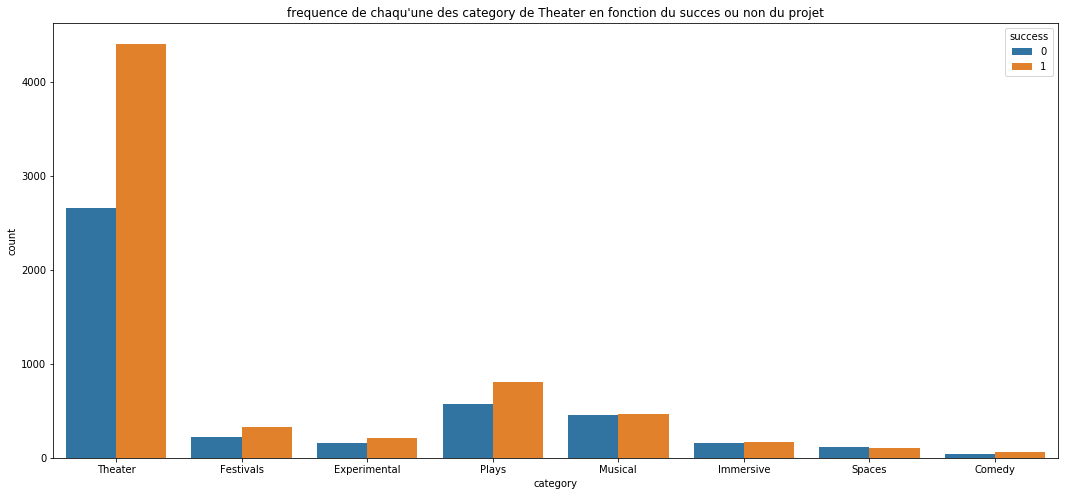

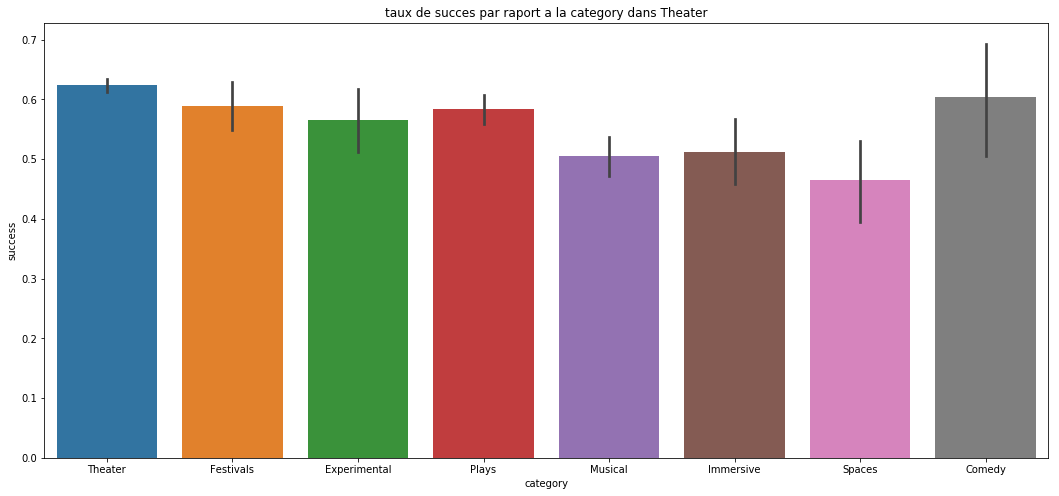

In [20]:
plt.subplots(figsize=(18,8))
df.category[df.main_category == 'Theater'].value_counts().plot.bar()
plt.title('frequence de chaqu\'une des category de Theater')
plt.subplots(figsize=(18,8))
sns.countplot(x="category", hue="success", data=df[df.main_category == 'Theater'])
plt.title('frequence de chaqu\'une des category de Theater en fonction du succes ou non du projet')
plt.subplots(figsize=(18,8))
sns.barplot(x = df.category[df.main_category == 'Theater'], y = df.success[df.main_category == 'Theater'],data=df)
plt.title('taux de succes par raport a la category dans Theater')

on en conclue donc que pour avoir plus de chance de succés un projet doit figurer dans la category Dance ,Theater ou encore comedy car elle ont un taux de succes superieur a 60%

## 7/ le "goal"  

Text(0.5, 1.0, 'frequence des goal dans les projets')

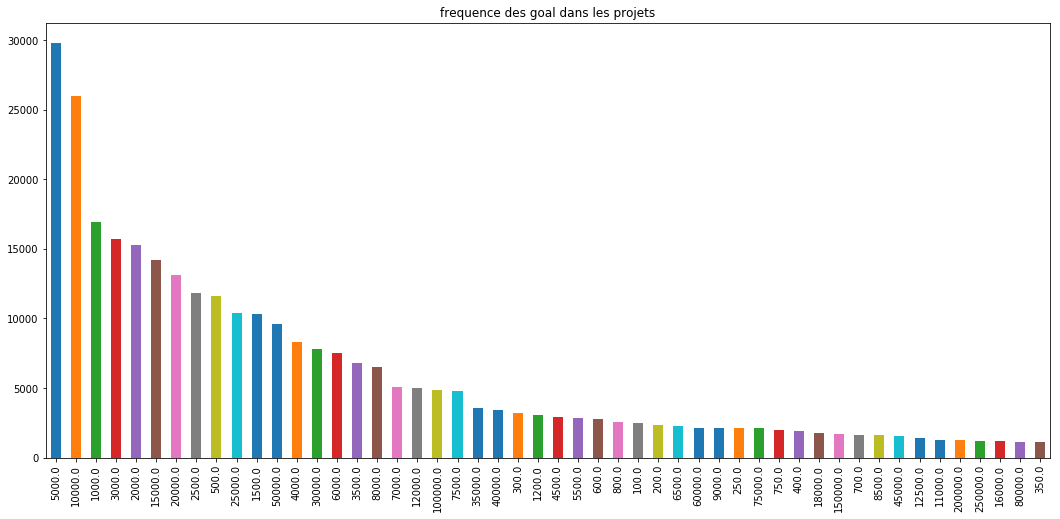

In [21]:
plt.subplots(figsize=(18,8))
df.goal.value_counts().head(50).plot.bar()
plt.title('frequence des goal dans les projets')

Text(0.5, 1.0, 'goals des projet en fonction de leur succés ou non')

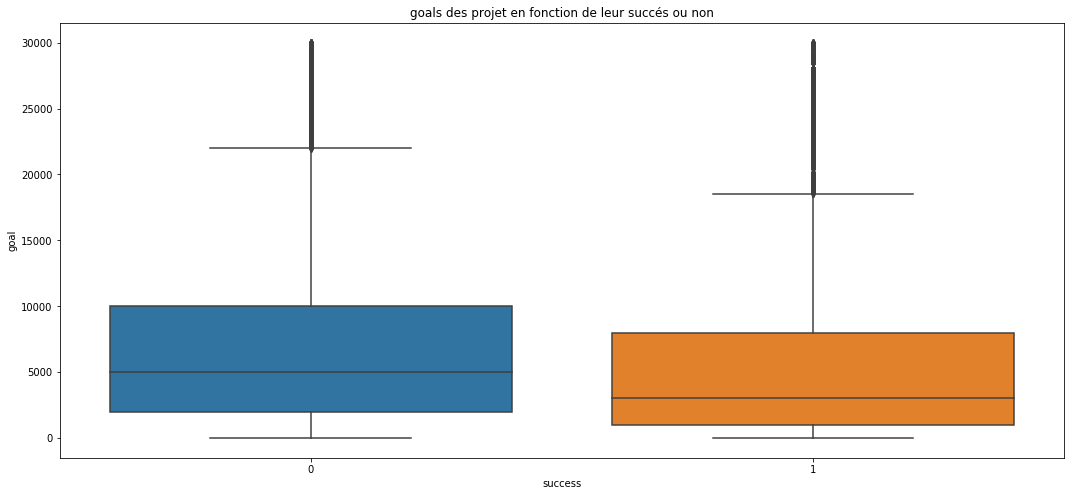

In [22]:
plt.subplots(figsize=(18,8))
sns.boxplot(x='success',y='goal',data=df[df.goal<30000])
plt.title('goals des projet en fonction de leur succés ou non')

on en conclu que les projets avec un plus fort taux de succes sont les projet moins couteux entre 0 et 20000 de goal

## 8/ les "pledged"  

Text(0.5, 1.0, 'frequence des pledged dans les projets')

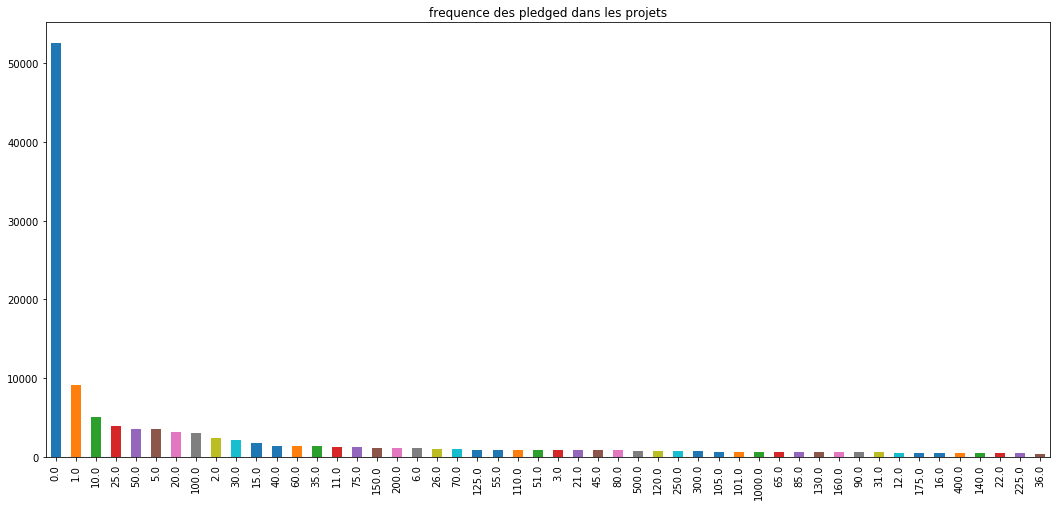

In [23]:
plt.subplots(figsize=(18,8))
df.pledged.value_counts().head(50).plot.bar()
plt.title('frequence des pledged dans les projets')

Text(0.5, 1.0, 'pledged des projet en fonction de leur succés ou non')

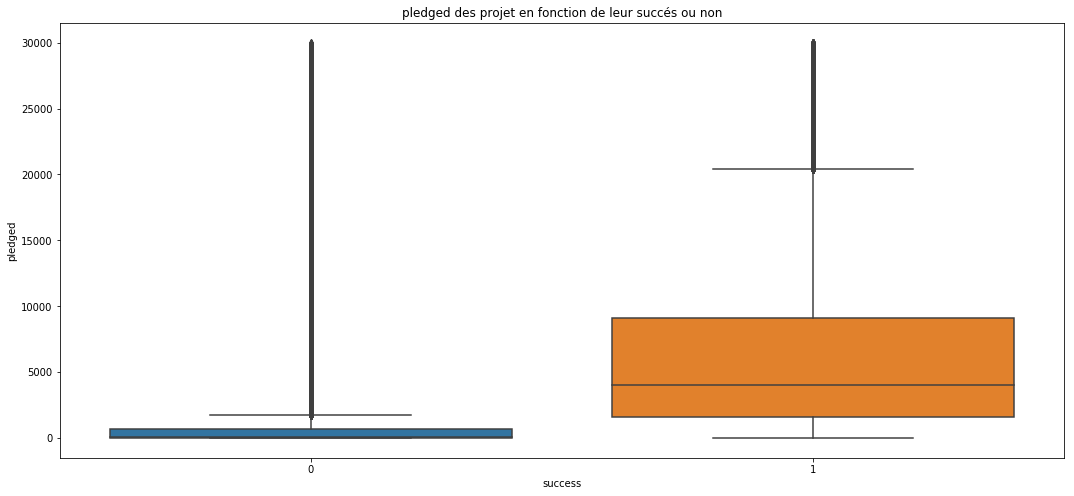

In [24]:
plt.subplots(figsize=(18,8))
sns.boxplot(x='success',y='pledged',data=df[df.pledged < 30000])
plt.title('pledged des projet en fonction de leur succés ou non')

on voit que les projet ayant reussit sont ceux avec un plus grand nombre de pledged

## 9/ les "backers"

Text(0.5, 1.0, 'frequence des backers dans les projets')

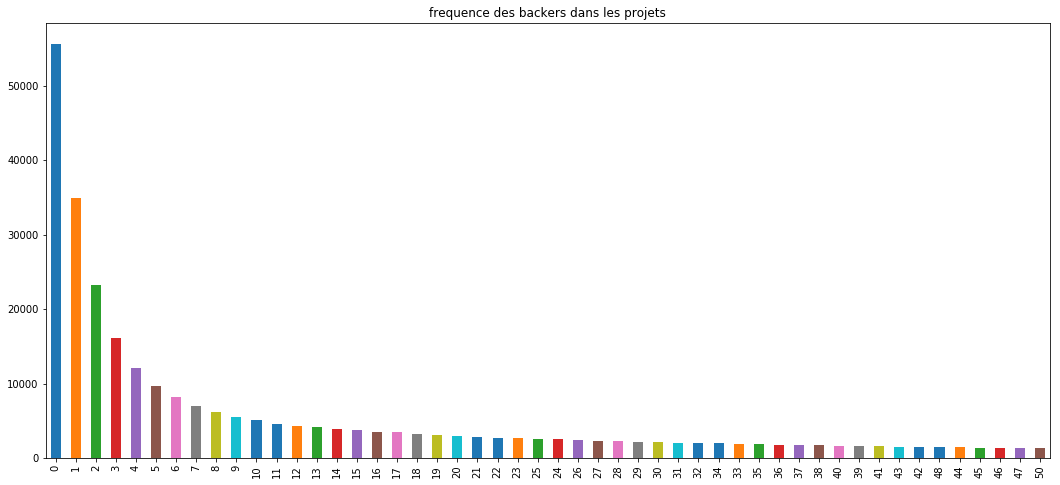

In [25]:
plt.subplots(figsize=(18,8))
df.backers.value_counts().head(50).plot.bar()
plt.title('frequence des backers dans les projets')

Text(0.5, 1.0, 'backers des projet en fonction de leur succés ou non')

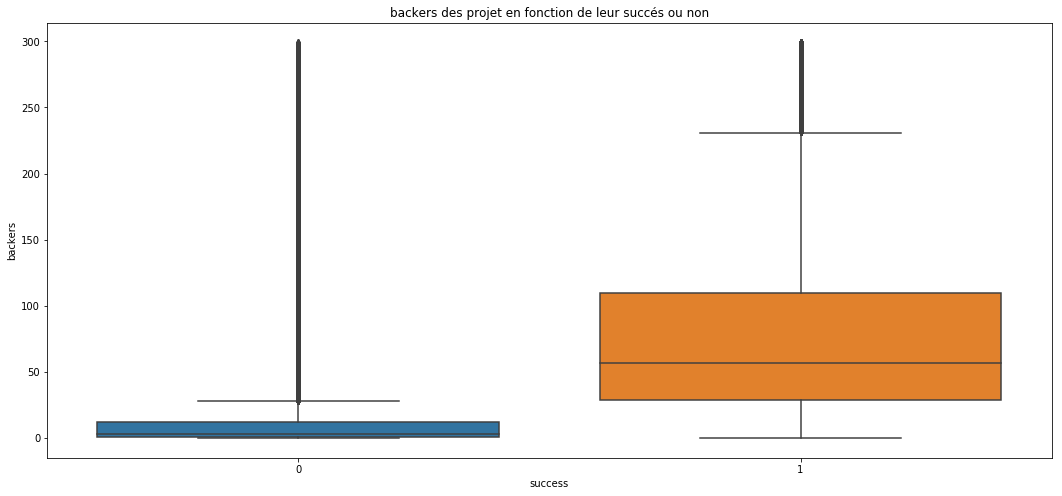

In [26]:
plt.subplots(figsize=(18,8))
sns.boxplot(x='success',y='backers',data=df[df.backers < 300])
plt.title('backers des projet en fonction de leur succés ou non')

on voit que les projet ayant reussit sont ceux avec un plus grand nombre de backers

## 10/ les dates

In [27]:
#ajout d'une colonnes 'launch_month' qui pend en valeur le mois de lancement
df.insert(column = 'launch_month',value = ' no_month ',loc = 14)
df.launch_month[df.launched.str.contains("-01-")] = "jan"
df.launch_month[df.launched.str.contains("-02-")] = "fev"
df.launch_month[df.launched.str.contains("-03-")] = "mar"
df.launch_month[df.launched.str.contains("-04-")] = "avr"
df.launch_month[df.launched.str.contains("-05-")] = "mai"
df.launch_month[df.launched.str.contains("-06-")] = "juin"
df.launch_month[df.launched.str.contains("-07-")] = "juil"
df.launch_month[df.launched.str.contains("-08-")] = "aou"
df.launch_month[df.launched.str.contains("-09-")] = "sep"
df.launch_month[df.launched.str.contains("-10-")] = "oct"
df.launch_month[df.launched.str.contains("-11-")] = "nov"
df.launch_month[df.launched.str.contains("-12-")] = "dec"

Text(0.5, 1.0, 'frequence des mois de lancement dans les projets')

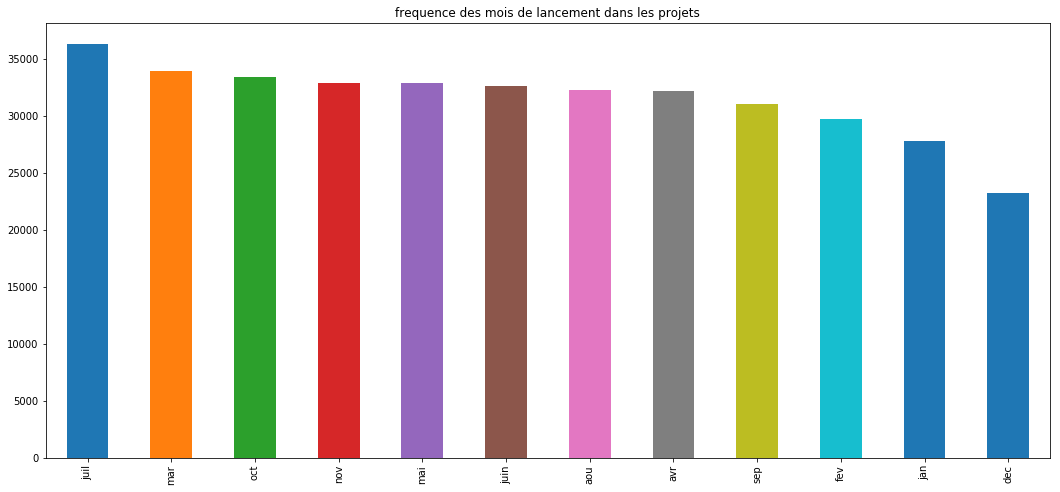

In [28]:
plt.subplots(figsize=(18,8))
df.launch_month.value_counts().head(50).plot.bar()
plt.title('frequence des mois de lancement dans les projets')

Text(0.5, 1.0, 'taux de succes par raport au mois de lancement')

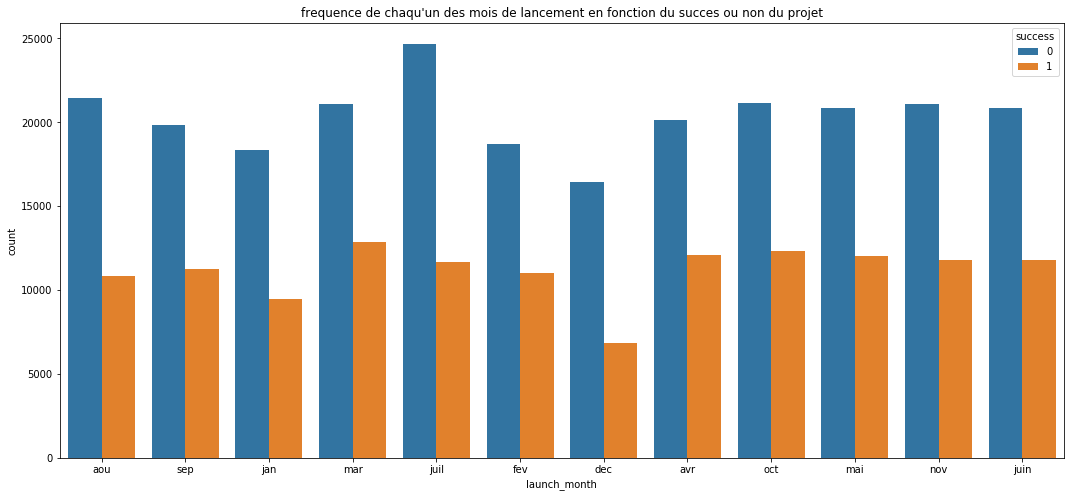

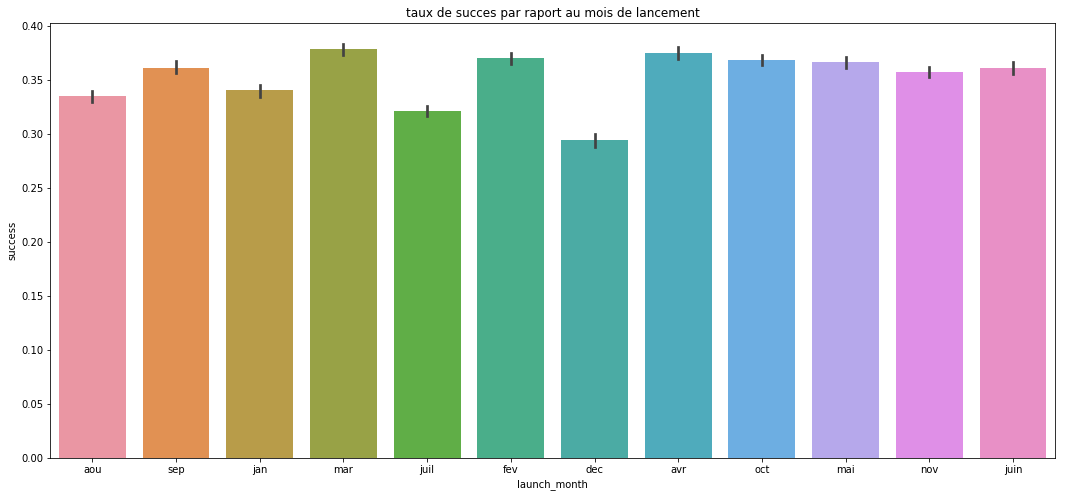

In [29]:
plt.subplots(figsize=(18,8))
sns.countplot(x="launch_month", hue="success", data=df)
plt.title('frequence de chaqu\'un des mois de lancement en fonction du succes ou non du projet')
plt.subplots(figsize=(18,8))
sns.barplot(x = 'launch_month', y = df.success,data=df)
plt.title('taux de succes par raport au mois de lancement')

on en conclu que pour maximiser le taux de succés il faut preferer les mois de mars avril ou encore fevrier

## 11/ analyse global

Text(0.5, 1.0, "analyse des donnes numeriques dans le cadre d'un succés pour toutes les main_category")

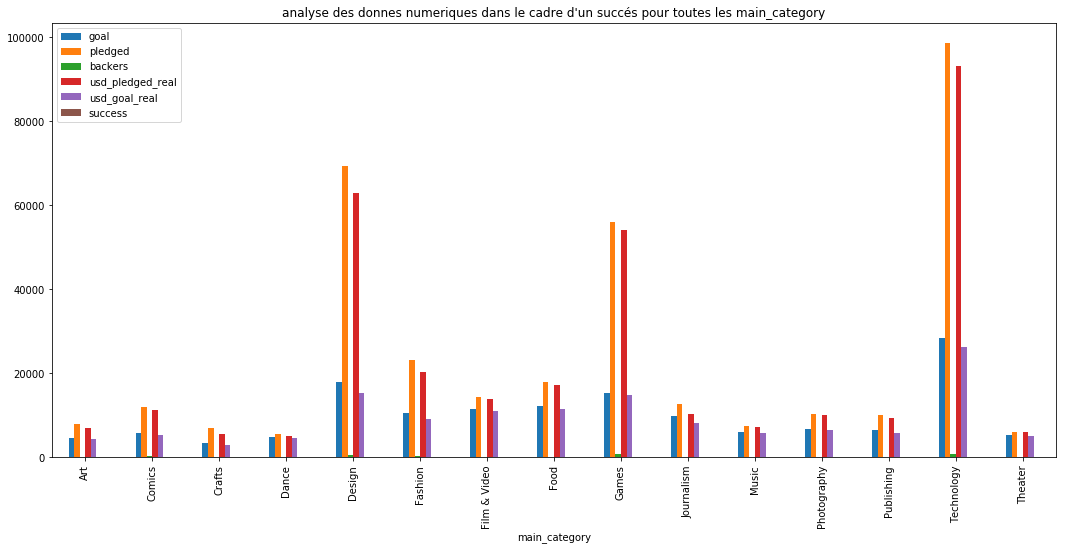

In [30]:
df2 = df[df.success == 1].groupby(['main_category']).mean()
df2.plot(figsize = (18,8), kind = 'bar')
plt.title('analyse des donnes numeriques dans le cadre d\'un succés pour toutes les main_category')

Text(0.5, 1.0, "analyse des donnes numeriques dans le cadre d'un echec pour toutes les main_category")

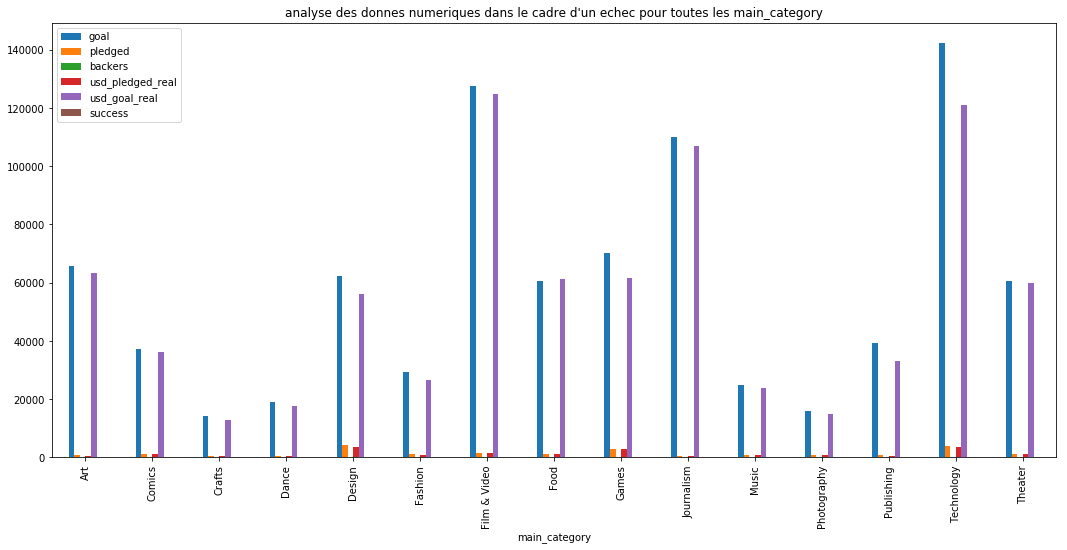

In [31]:
df3 = df[df.success == 0].groupby(['main_category']).mean()
df3.success *= 10000
df3.plot(figsize = (18,8), kind = 'bar')
plt.title('analyse des donnes numeriques dans le cadre d\'un echec pour toutes les main_category')

- on voit que les projet qui reussice sont ceux avec un goal faible mais des pledged et backers haut
- on voit aussi que les category qui sont succeptible de repporter le plus d'argent sont design , games et technologie.

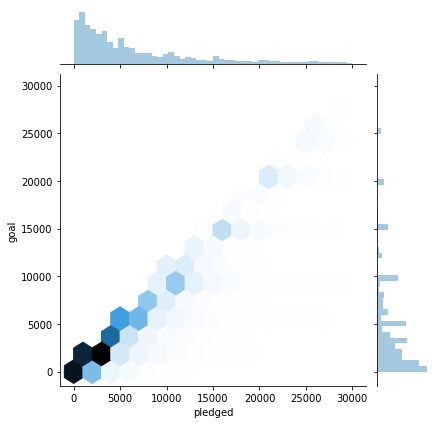

In [32]:
sns.jointplot(x="pledged", y="goal", data=df[(df.goal<30000)&(df.pledged<30000)&(df.success == 1)],kind="hex",gridsize=15)

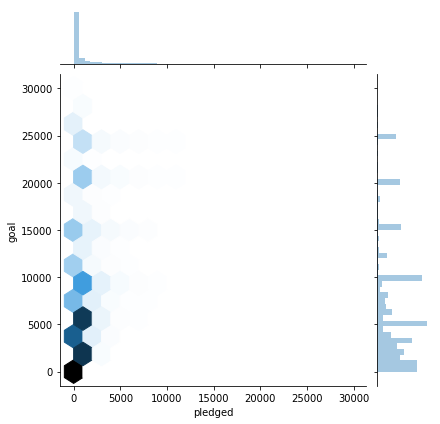

In [33]:
sns.jointplot(x="pledged", y="goal", data=df[(df.goal<30000)&(df.pledged<30000)&(df.success == 0)],kind="hex",gridsize=15)

- on voit ici que goal et pledged est fortement correller 
- on voit aussi que dans le cas d'une reussite les valeur semble suivre une droite de type X=Y alors que pour l'echeque la droite serait pluto de type X=0  
- on peut donc en conclure que quand un projet est un succes goal est quasiment eguale a pledged mais a l'inverse si c'est un echecue le pledged est souvent proch de 0

## 12/ conclusion

En conclusion nous pouvons voire que la prediction d'un succés ou non depend principalement des goal et des pledge cependant certaine autres tendance se deguage comme la categorie, les backers ou encore le mois de lancement    
    
*exemple d'un profil type de succés:  
  
- category -> Dance  
- main_category -> Dance	  
- goal -> 3000  
- launch_month -> march	  
- backers -> 200  
- pledged -> 4000  